In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from ipynb.fs.full.Clustering_Std_KMEANS import *

In [13]:
globalA['cluster'] = km.labels_
globalA

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Events,sumNumMentions,materialConfCoop,verbalConfCoop,avgAvgTone,avgGoldstein,fightCount,expressCount,cluster
0,1157,5759,0.076923,0.095073,-0.611187,1.344339,32,39,5
1,2368,10816,0.101351,0.096284,-0.848553,1.409502,71,31,5
2,91214,406209,0.116769,0.112329,-1.620540,0.938684,5132,2377,7
3,819808,3472270,0.157140,0.125978,-2.259814,0.370862,57716,19788,0
4,3737,21539,0.105165,0.066899,-1.142919,1.816189,70,56,5
...,...,...,...,...,...,...,...,...,...
158,2934,12736,0.163258,0.090661,-2.051315,0.893661,198,25,4
159,3173,19328,0.064608,0.108100,-0.553450,1.850898,77,41,1
160,4222,27050,0.107532,0.115348,-0.365621,1.132568,184,109,5
161,1463,6435,0.157895,0.118250,-1.277058,0.225632,118,16,4


In [21]:
def test_measure(measure):

    print('{}, minimum value: {}, maximum value: {}\n'.format(
        globalA.columns[measure],
        subset.iloc[:, measure].min(),
        subset.iloc[:, measure].max()
        ))

for cluster in range(10):
    print('Cluster: {}'.format(cluster))
    subset = globalA[globalA.cluster==cluster]
    for measure in range(8):
        test_measure(measure)

Cluster: 0
Events, minimum value: 819808, maximum value: 819808

sumNumMentions, minimum value: 3472270, maximum value: 3472270

materialConfCoop, minimum value: 0.1571404523986104, maximum value: 0.1571404523986104

verbalConfCoop, minimum value: 0.12597827784066512, maximum value: 0.12597827784066512

avgAvgTone, minimum value: -2.2598142001605424, maximum value: -2.2598142001605424

avgGoldstein, minimum value: 0.3708619579218547, maximum value: 0.3708619579218547

fightCount, minimum value: 57716, maximum value: 57716

expressCount, minimum value: 19788, maximum value: 19788

Cluster: 1
Events, minimum value: 261, maximum value: 11683

sumNumMentions, minimum value: 1420, maximum value: 52381

materialConfCoop, minimum value: 0.03709677419354839, maximum value: 0.09900990099009901

verbalConfCoop, minimum value: 0.0476878612716763, maximum value: 0.12570356472795494

avgAvgTone, minimum value: -0.9220923735536036, maximum value: 0.4017937984413717

avgGoldstein, minimum value: 1.47

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


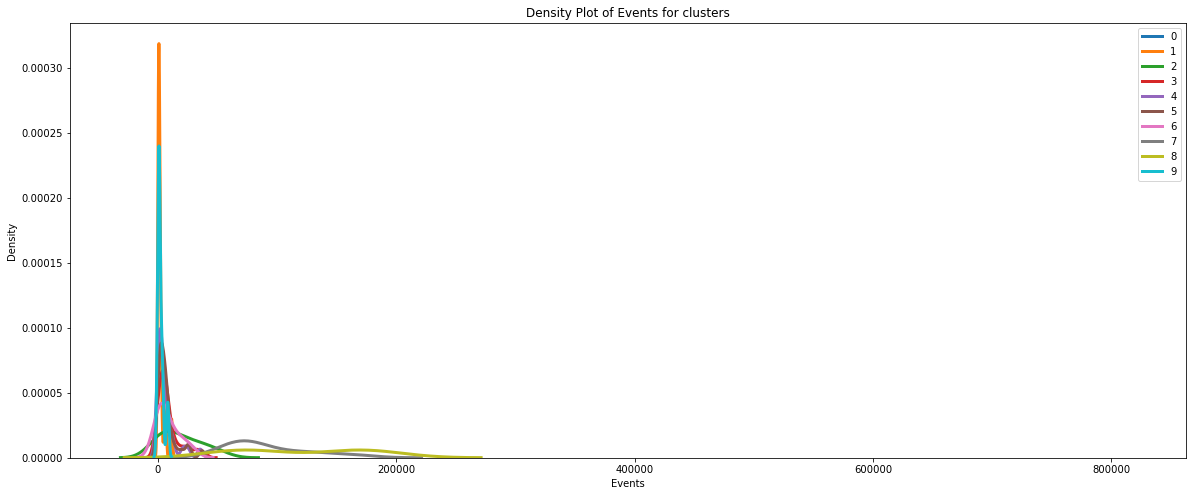

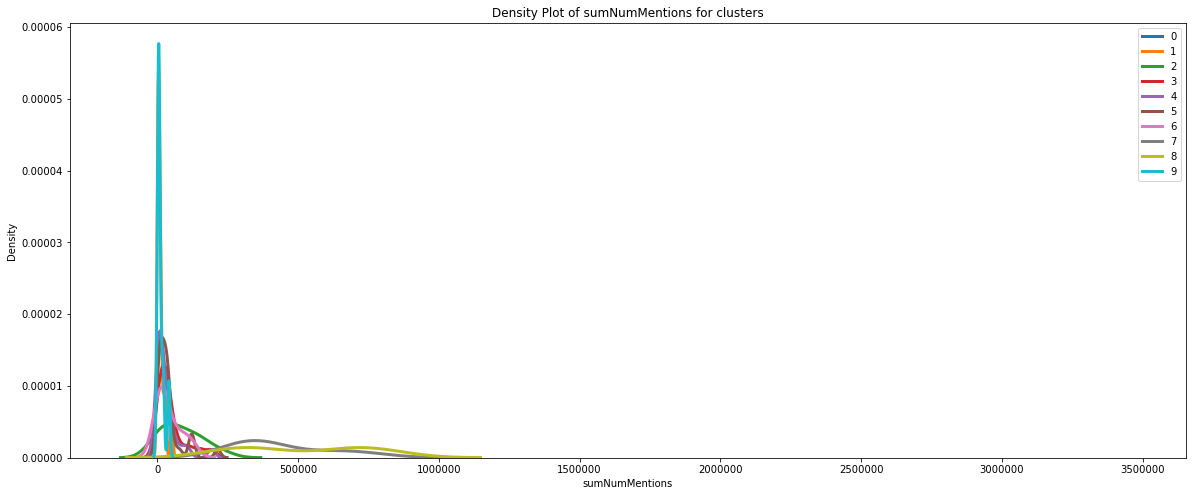

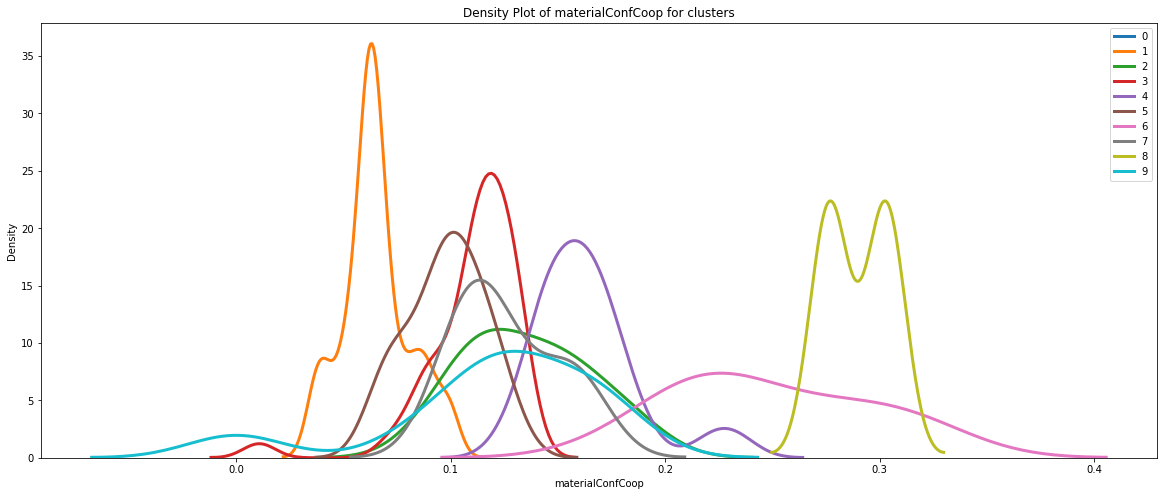

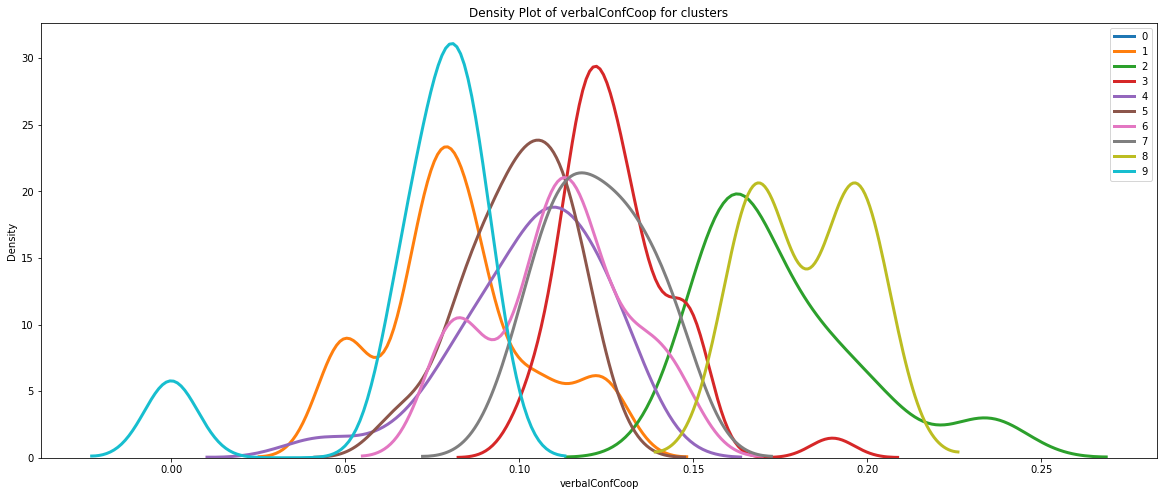

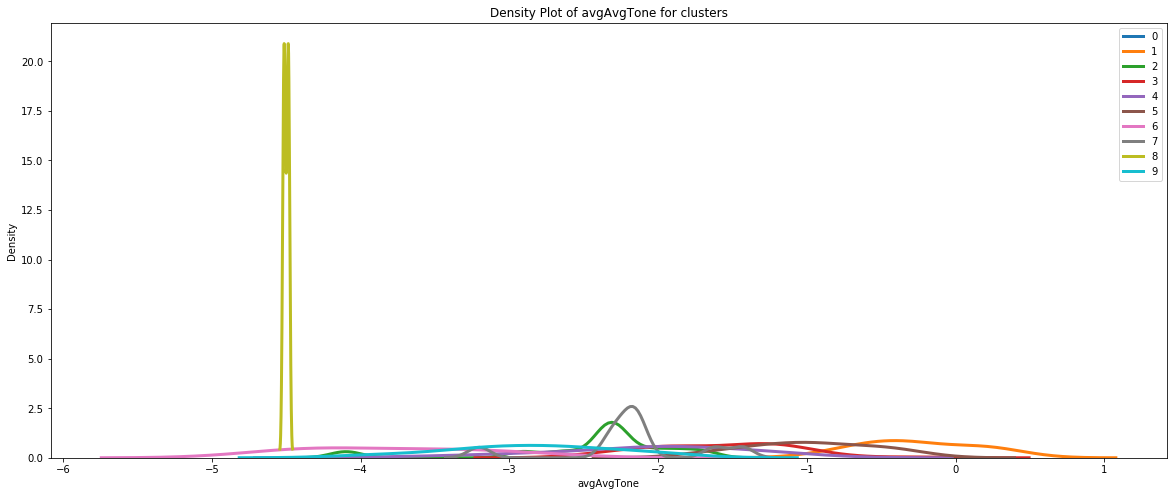

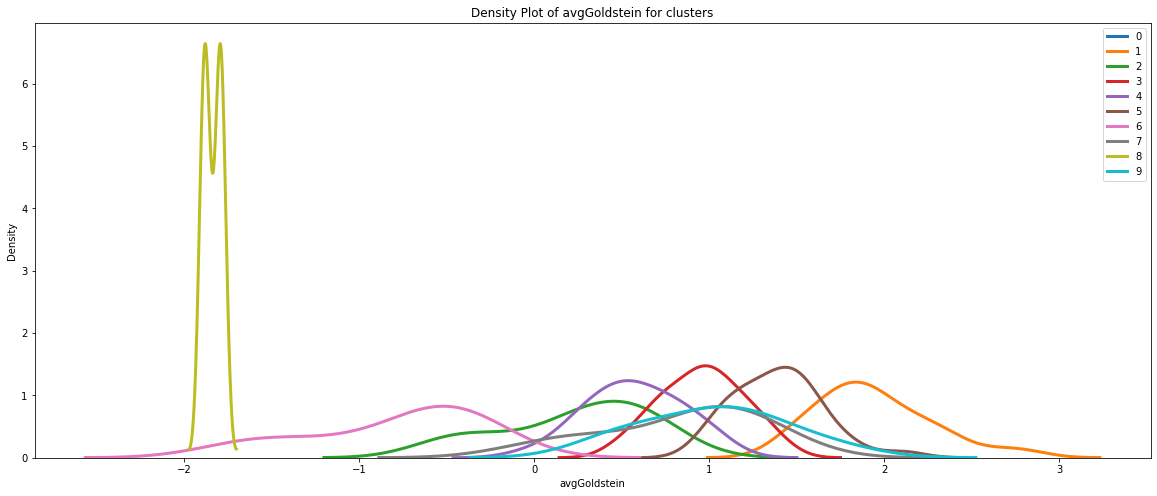

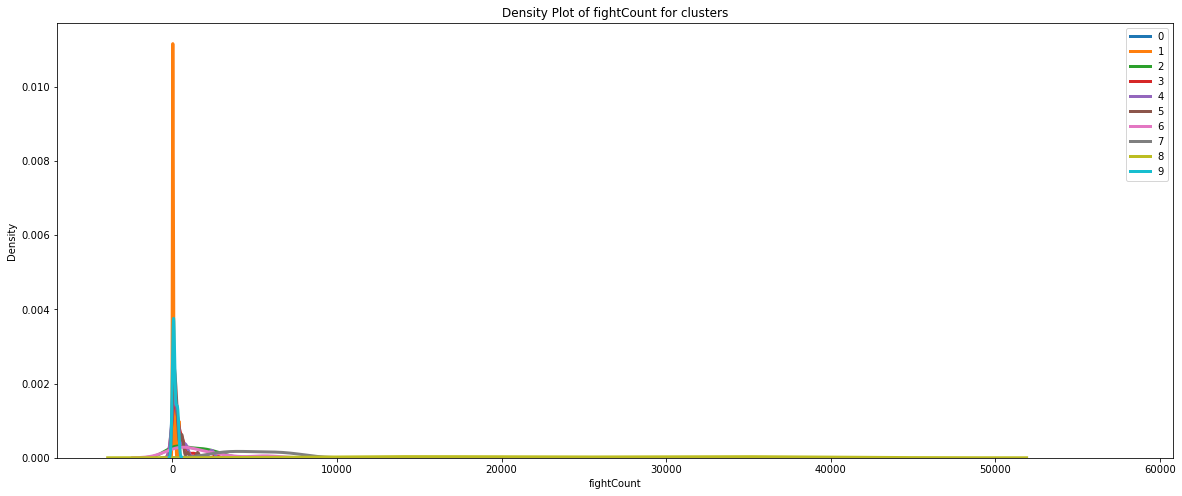

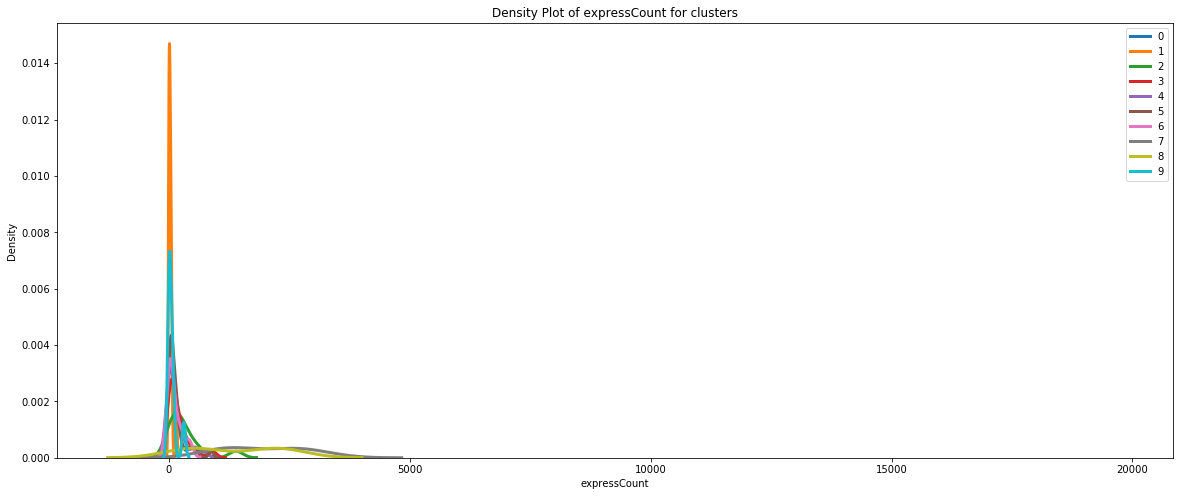

In [26]:
for measure in range(8):
    for cluster in range(10):
        # Subset to the airline
        subset = globalA[globalA.cluster==cluster]
        measure_name = globalA.iloc[:, measure].name

        # Draw the density plot
        g = sns.distplot(subset.iloc[:, measure], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = cluster)
    plt.title('Density Plot of {} for clusters'.format(measure_name))
    plt.ylabel('Density')
    g.figure.set_size_inches(20,8)
    plt.savefig('text/fig/CLUST/density_{}.png'.format(measure_name), bbox_inches='tight')

    plt.show()